<a href="https://colab.research.google.com/github/saiprashanthig/Deep_Learning_Algorithm_for_ASL_Recognition/blob/main/MLPP23_2023_02_14_slr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MLPP23 // Sea Level Rise: Rudimentary Data Science Notebook**

*Feb 14, 2023*

This notebook will go through a bare-bones example of the Data Science process using global sea-level rise as a case study.

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PROBLEM DEFINITION**

- Question: what is the rate of global sea level rise in mm/yr?
- Data required: sea level in mm

**DATA COLLECTION**

In [2]:
# -- link Google Drive with this notebook
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd

In [6]:
# -- define the file path
fname = "/content/drive/MyDrive/mlpp23/data/noaa/slr_sla_gbl_free_txj1j2_90.csv"

In [7]:
# -- read the data
data = pd.read_csv(fname, skiprows=5)

In [8]:
data #list of satellites which collected data of sea level mentioned below. 4 satellites.

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3
0,1992.9614,-19.24,NaN,NaN,NaN
1,1992.9865,-19.65,NaN,NaN,NaN
2,1993.0123,-15.32,NaN,NaN,NaN
3,1993.0407,-19.12,NaN,NaN,NaN
4,1993.0660,-23.64,NaN,NaN,NaN
...,...,...,...,...,...
1349,2022.7463,NaN,NaN,NaN,76.13
1350,2022.7733,NaN,NaN,NaN,74.74
1351,2022.7992,NaN,NaN,NaN,73.83
1352,2022.8295,NaN,NaN,NaN,74.40


**DATA PREPARATION**

In [9]:
# -- define subset of the data
cols = data.columns[1:5] #dosen't take the 5th column name
print(cols)
sub = data[cols]

Index(['TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3'], dtype='object')


In [10]:
sub.min(axis=0) #0 across column , 1 across row

TOPEX/Poseidon   -26.93
Jason-1            0.86
Jason-2           20.02
Jason-3           48.38
dtype: float64

In [11]:
# -- take the minimum value across columns
data["minlev"] = sub.min(axis=1) #taking the minimum value across row

In [12]:
data

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,minlev
0,1992.9614,-19.24,NaN,NaN,NaN,-19.24
1,1992.9865,-19.65,NaN,NaN,NaN,-19.65
2,1993.0123,-15.32,NaN,NaN,NaN,-15.32
3,1993.0407,-19.12,NaN,NaN,NaN,-19.12
4,1993.0660,-23.64,NaN,NaN,NaN,-23.64
...,...,...,...,...,...,...
1349,2022.7463,NaN,NaN,NaN,76.13,76.13
1350,2022.7733,NaN,NaN,NaN,74.74,74.74
1351,2022.7992,NaN,NaN,NaN,73.83,73.83
1352,2022.8295,NaN,NaN,NaN,74.40,74.40


<Axes: xlabel='year'>

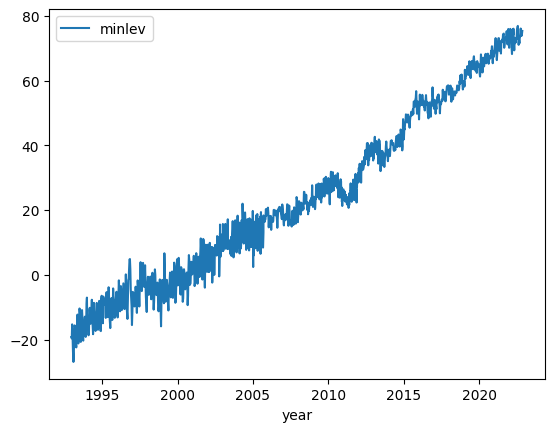

In [13]:
data.plot("year", "minlev")

**MACHINE LEARNING**

# -- perform linear regression


In [15]:
slope, offset = np.polyfit(data["year"], data["minlev"], 1) #polyfit gives the slope and intercept , 1 indicates the degree of the polynomial

In [16]:
slope

3.064585893346327

In [17]:
offset

-6129.928493704469

In [18]:
# -- create a model
model = slope * data["year"] + offset
data["model"] = model

In [19]:
data

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,minlev,model
0,1992.9614,-19.24,NaN,NaN,NaN,-19.24,-22.327101
1,1992.9865,-19.65,NaN,NaN,NaN,-19.65,-22.250180
2,1993.0123,-15.32,NaN,NaN,NaN,-15.32,-22.171114
3,1993.0407,-19.12,NaN,NaN,NaN,-19.12,-22.084080
4,1993.0660,-23.64,NaN,NaN,NaN,-23.64,-22.006546
...,...,...,...,...,...,...,...
1349,2022.7463,NaN,NaN,NaN,76.13,76.13,68.951283
1350,2022.7733,NaN,NaN,NaN,74.74,74.74,69.034027
1351,2022.7992,NaN,NaN,NaN,73.83,73.83,69.113400
1352,2022.8295,NaN,NaN,NaN,74.40,74.40,69.206257


<Axes: ylabel='sea level relative to 2000 [mm]'>

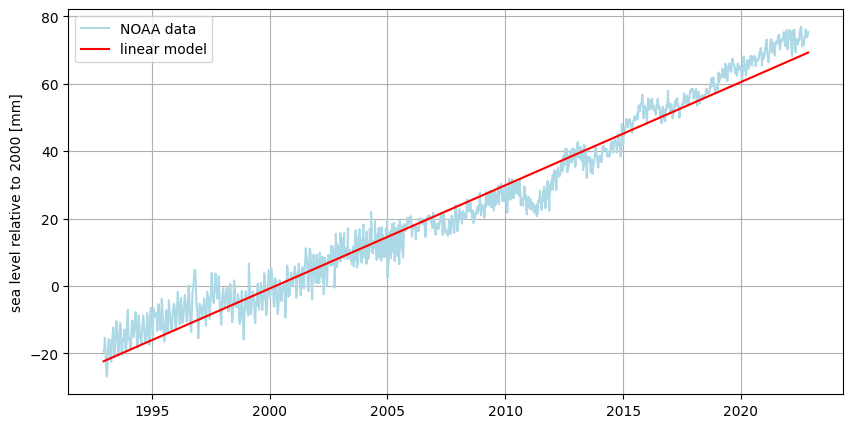

In [20]:
data.plot("year", ["minlev", "model"], figsize=(10, 5), grid=True, xlabel="",
          ylabel="sea level relative to 2000 [mm]", label=["NOAA data", "linear model"],
          color=["lightblue", "red"]) #sea level relative to 2000 as it is 0 in 2000

**PROBLEM SOLUTION**

In [21]:
print("rate of sea level rise between {0} and {1} is {2} mm/yr".format(data["year"].iloc[0], data["year"].iloc[-1], slope))

rate of sea level rise between 1992.9614 and 2022.8538 is 3.064585893346327 mm/yr
